In [1]:
import pandas as pd
import datetime
df = pd.read_csv('mta_test.txt')
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,00:00:00,REGULAR,7447810,2532191
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,04:00:00,REGULAR,7447812,2532197
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,08:00:00,REGULAR,7447824,2532208
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,12:00:00,REGULAR,7447852,2532248
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,16:00:00,REGULAR,7447937,2532276
...,...,...,...,...,...,...,...,...,...,...,...
217827,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/28/2020,05:00:00,REGULAR,5554,540
217828,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/28/2020,09:00:00,REGULAR,5554,540
217829,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/28/2020,13:00:00,REGULAR,5554,540
217830,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/28/2020,17:00:00,REGULAR,5554,540


In [2]:
df[['DATE','TIME','STATION','ENTRIES','EXITS']]

KeyError: "['EXITS'] not in index"

Error due to columns has blank space in "EXITS"

In [3]:
for col in df.columns:
    print(col,len(col))

C/A 3
UNIT 4
SCP 3
STATION 7
LINENAME 8
DIVISION 8
DATE 4
TIME 4
DESC 4
ENTRIES 7
EXITS                                                                68


Check column length reveals blanks in "EXITS.

In [4]:
for col in df.columns:
    df.rename(columns={col:col.strip()}, inplace=True)

In [5]:
for col in df.columns:
    print(col,len(col))

C/A 3
UNIT 4
SCP 3
STATION 7
LINENAME 8
DIVISION 8
DATE 4
TIME 4
DESC 4
ENTRIES 7
EXITS 5


Excess blanks spaces removed in "EXITS".

In [6]:
df[['DATE','TIME','STATION','ENTRIES','EXITS']]

,DATE,TIME,STATION,ENTRIES,EXITS
0,08/22/2020,00:00:00,59 ST,7447810,2532191
1,08/22/2020,04:00:00,59 ST,7447812,2532197
2,08/22/2020,08:00:00,59 ST,7447824,2532208
3,08/22/2020,12:00:00,59 ST,7447852,2532248
4,08/22/2020,16:00:00,59 ST,7447937,2532276
...,...,...,...,...,...
217827,08/28/2020,05:00:00,RIT-ROOSEVELT,5554,540
217828,08/28/2020,09:00:00,RIT-ROOSEVELT,5554,540
217829,08/28/2020,13:00:00,RIT-ROOSEVELT,5554,540
217830,08/28/2020,17:00:00,RIT-ROOSEVELT,5554,540


In [7]:
dfmax= df.groupby(['STATION'])['ENTRIES'].max().sort_values(ascending=False)
dfmax

STATION
14 ST              2128749873
CHAMBERS ST        2116087509
COURT SQ           2066623348
BAYCHESTER AV      2063978823
3 AV 138 ST        2046370344
                      ...    
9TH STREET             193997
NEWARK C               172504
NEWARK HW BMEBE        144530
PATH WTC 2             138802
NEWARK HM HE            22633
Name: ENTRIES, Length: 379, dtype: int64

In [8]:
from datetime import datetime as dt
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [9]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,00:00:00,REGULAR,7447810,2532191,2020-08-22 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,04:00:00,REGULAR,7447812,2532197,2020-08-22 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,08:00:00,REGULAR,7447824,2532208,2020-08-22 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,12:00:00,REGULAR,7447852,2532248,2020-08-22 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,16:00:00,REGULAR,7447937,2532276,2020-08-22 16:00:00


To determine if there is duplicate data by including date_time. Date-time would be a unique factor to group duplicate data.

In [10]:
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
87780,N333A,R141,00-00-00,FOREST HILLS 71,2020-08-26 05:00:00,2
40591,J023,R436,00-00-00,NORWOOD AV,2020-08-25 05:00:00,2
0,A002,R051,02-00-00,59 ST,2020-08-22 00:00:00,1
145213,R127,R105,00-00-02,14 ST,2020-08-28 09:50:21,1
145215,R127,R105,00-00-02,14 ST,2020-08-28 16:00:00,1


Shows there is duplicate entries in "FOREST HILLS" AND "NORWOOD AV"

In [11]:
mask = ((df["C/A"] == "N333A") & 
(df["UNIT"] == "R141") & 
(df["SCP"] == "00-00-00") & 
(df["STATION"] == "FOREST HILLS 71") &
(df["DATE_TIME"].dt.date == datetime.datetime(2020, 8, 26).date()))
df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
87780,N333A,R141,00-00-00,FOREST HILLS 71,EFMR,IND,08/26/2020,01:00:00,REGULAR,1443526,2955419,2020-08-26 01:00:00
87781,N333A,R141,00-00-00,FOREST HILLS 71,EFMR,IND,08/26/2020,05:00:00,REGULAR,1443526,2955420,2020-08-26 05:00:00
87782,N333A,R141,00-00-00,FOREST HILLS 71,EFMR,IND,08/26/2020,05:00:00,RECOVR AUD,8,2,2020-08-26 05:00:00
87783,N333A,R141,00-00-00,FOREST HILLS 71,EFMR,IND,08/26/2020,09:00:00,REGULAR,1443535,2955448,2020-08-26 09:00:00
87784,N333A,R141,00-00-00,FOREST HILLS 71,EFMR,IND,08/26/2020,10:00:00,RECOVR AUD,8,82,2020-08-26 10:00:00


Pulling the data for 'FOREST HILL' shows the duplicate date

In [12]:
df.DESC.value_counts()

REGULAR       216725
RECOVR AUD      1107
Name: DESC, dtype: int64

Check the value counts before deleting (i.e drop) the duplicate data.

In [13]:
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [14]:
df.DESC.value_counts()

REGULAR       216725
RECOVR AUD      1105
Name: DESC, dtype: int64

Confirmed 2 value counts drops as duplicate. Data is now clean from duplicates.

In [15]:
df = df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

Drop "EXITS AND DESC" from data.

In [16]:
df_daily = (df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False).ENTRIES.first())

In [17]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,08/22/2020,7448054
1,A002,R051,02-00-00,59 ST,08/23/2020,7448305
2,A002,R051,02-00-00,59 ST,08/24/2020,7448718
3,A002,R051,02-00-00,59 ST,08/25/2020,7449237
4,A002,R051,02-00-00,59 ST,08/26/2020,7449696


In [18]:
df_daily[["PREV_DATE", "PREV_ENTRIES"]] = (df_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]]
                                            .apply(lambda grp: grp.shift(1)))

In [19]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,08/22/2020,7448054,NaN,NaN
1,A002,R051,02-00-00,59 ST,08/23/2020,7448305,08/22/2020,7448054.0
2,A002,R051,02-00-00,59 ST,08/24/2020,7448718,08/23/2020,7448305.0
3,A002,R051,02-00-00,59 ST,08/25/2020,7449237,08/24/2020,7448718.0
4,A002,R051,02-00-00,59 ST,08/26/2020,7449696,08/25/2020,7449237.0


Remove data not available to calculate previous date entries. E.g On 8/22/2020, we cannot get previous date 8/21/2020 entries to less off to get current date entries

In [20]:
df_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [21]:
df_daily[df_daily["ENTRIES"] < df_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
267,A011,R080,01-03-00,57 ST-7 AV,08/23/2020,885655164,08/22/2020,885655237.0
268,A011,R080,01-03-00,57 ST-7 AV,08/24/2020,885655029,08/23/2020,885655164.0
269,A011,R080,01-03-00,57 ST-7 AV,08/25/2020,885654873,08/24/2020,885655029.0
270,A011,R080,01-03-00,57 ST-7 AV,08/26/2020,885654713,08/25/2020,885654873.0
271,A011,R080,01-03-00,57 ST-7 AV,08/27/2020,885654553,08/26/2020,885654713.0


Checking for current date entries is less than previous day entries.

In [22]:
mask = ((df["C/A"] == "A011") & 
(df["UNIT"] == "R080") & 
(df["SCP"] == "01-03-00") & 
(df["STATION"] == "57 ST-7 AV") &
(df["DATE_TIME"].dt.date == datetime.datetime(2020, 8, 22).date()))
df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
1593,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,08/22/2020,20:00:00,885655237,2020-08-22 20:00:00
1592,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,08/22/2020,16:00:00,885655252,2020-08-22 16:00:00
1591,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,08/22/2020,12:00:00,885655268,2020-08-22 12:00:00
1590,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,08/22/2020,08:00:00,885655278,2020-08-22 08:00:00
1589,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,08/22/2020,04:00:00,885655281,2020-08-22 04:00:00


In [23]:
(df_daily[df_daily["ENTRIES"] < df_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION        
A011   R080  01-03-00  57 ST-7 AV         6
A025   R023  01-03-01  34 ST-HERALD SQ    6
A049   R088  02-05-00  CORTLANDT ST       1
A066   R118  00-00-00  CANAL ST           6
C008   R099  00-00-00  DEKALB AV          6
D011   R394  01-06-00  BAY PKWY           6
             01-06-01  BAY PKWY           6
H001   R175  00-00-00  8 AV               6
             00-06-00  8 AV               1
H003   R163  01-00-02  6 AV               6
H023   R236  00-06-00  DEKALB AV          6
J031   R006  00-00-03  WOODHAVEN BLVD     1
K026   R100  00-00-01  METROPOLITAN AV    6
N006A  R280  00-00-00  190 ST             6
N056   R188  01-00-03  50 ST              6
N063A  R011  00-00-04  42 ST-PORT AUTH    6
             00-00-05  42 ST-PORT AUTH    6
             00-00-08  42 ST-PORT AUTH    6
N078   R175  01-00-03  14 ST              6
N110   R283  00-06-00  LAFAYETTE AV       6
N137   R354  00-06-01  104 ST             6
N203   R195  00-00-01  161/YANKEE STA

Showing how many stations have the current date entries below previous date entries.

In [24]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
df_daily["DAILY_ENTRIES"] = df_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

279 8291685.0
127 7326231.0


In [25]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,08/23/2020,7448305,08/22/2020,7448054.0,251.0
2,A002,R051,02-00-00,59 ST,08/24/2020,7448718,08/23/2020,7448305.0,413.0
3,A002,R051,02-00-00,59 ST,08/25/2020,7449237,08/24/2020,7448718.0,519.0
4,A002,R051,02-00-00,59 ST,08/26/2020,7449696,08/25/2020,7449237.0,459.0
5,A002,R051,02-00-00,59 ST,08/27/2020,7450207,08/26/2020,7449696.0,511.0


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

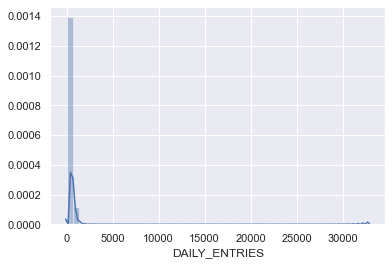

In [27]:
sns.distplot(df_daily['DAILY_ENTRIES']
             [df_daily['DAILY_ENTRIES'] < 50000])

In [28]:
stations_daily = \
(df_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum()
                .reset_index())

stations_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,08/23/2020,3337.0
1,1 AV,08/24/2020,4202.0
2,1 AV,08/25/2020,5179.0
3,1 AV,08/26/2020,5433.0
4,1 AV,08/27/2020,5442.0


In [29]:
# then get top 10 stations by daily volume 
# (sum across all days is a reasonable way to define this)
 
top10_stations = (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False)
                   .STATION.head(10))

top10_stations

16      149/GRAND CONC
104               8 AV
233    GRD CNTRL-42 ST
61      34 ST-PENN STA
59     34 ST-HERALD SQ
9               125 ST
68     42 ST-PORT AUTH
110              86 ST
46               23 ST
14      14 ST-UNION SQ
Name: STATION, dtype: object

In [30]:
stations_daily_top10 = \
    stations_daily[stations_daily['STATION'].isin(top10_stations)]

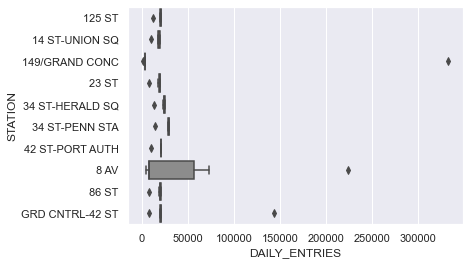

In [31]:
sns.boxplot('DAILY_ENTRIES', 'STATION', data=stations_daily_top10)

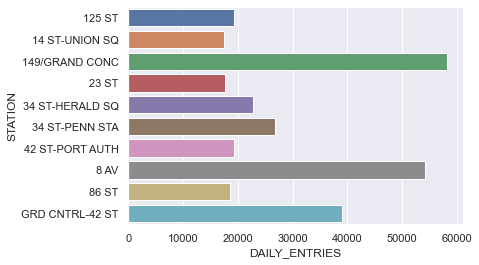

In [32]:
sns.barplot('DAILY_ENTRIES', 'STATION', data=stations_daily_top10, ci=None)

In [33]:
df_datetime = (df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"],as_index=False).ENTRIES.first())

In [34]:
df_datetime.head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-08-22 00:00:00,7447810
1,A002,R051,02-00-00,59 ST,2020-08-22 04:00:00,7447812
2,A002,R051,02-00-00,59 ST,2020-08-22 08:00:00,7447824
3,A002,R051,02-00-00,59 ST,2020-08-22 12:00:00,7447852
4,A002,R051,02-00-00,59 ST,2020-08-22 16:00:00,7447937
5,A002,R051,02-00-00,59 ST,2020-08-22 20:00:00,7448054
6,A002,R051,02-00-00,59 ST,2020-08-23 00:00:00,7448102
7,A002,R051,02-00-00,59 ST,2020-08-23 04:00:00,7448103
8,A002,R051,02-00-00,59 ST,2020-08-23 08:00:00,7448115
9,A002,R051,02-00-00,59 ST,2020-08-23 12:00:00,7448138


In [35]:
df_datetime[["PREV_DATETIME", "PREV_ENTRIES"]] = (df_datetime.groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE_TIME", "ENTRIES"]]
                                            .apply(lambda grp: grp.shift(1)))

In [36]:
df_datetime.dropna(subset=["PREV_DATETIME"], axis=0, inplace=True)

In [37]:
(df_datetime[df_datetime["ENTRIES"] < df_datetime["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         41
A025  R023  01-03-01  34 ST-HERALD SQ    41
A049  R088  02-05-00  CORTLANDT ST        1
A066  R118  00-00-00  CANAL ST           36
C008  R099  00-00-00  DEKALB AV          41
                                         ..
R401  R445  00-00-00  3 AV 138 ST        40
R412  R146  00-00-00  HUNTS POINT AV     36
R523  R147  00-00-04  61 ST WOODSIDE     38
R622  R123  00-00-00  FRANKLIN AV        41
R730  R431  00-00-04  EASTCHSTER/DYRE    40
Length: 64, dtype: int64

In [38]:
def get_datetime_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
df_datetime["DATETIME_ENTRIES"] = df_datetime.apply(get_datetime_counts, axis=1, max_counter=1000000)

0 8291685.0
1057774527 238650.0
238657 1057774527.0
30455396 1580157340.0
1580157347 30455396.0
62 1405482.0
1405501 62.0
8 1443535.0
1443563 8.0
75 7326245.0


In [39]:
df_datetime.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATETIME,PREV_ENTRIES,DATETIME_ENTRIES
1,A002,R051,02-00-00,59 ST,2020-08-22 04:00:00,7447812,2020-08-22 00:00:00,7447810.0,2.0
2,A002,R051,02-00-00,59 ST,2020-08-22 08:00:00,7447824,2020-08-22 04:00:00,7447812.0,12.0
3,A002,R051,02-00-00,59 ST,2020-08-22 12:00:00,7447852,2020-08-22 08:00:00,7447824.0,28.0
4,A002,R051,02-00-00,59 ST,2020-08-22 16:00:00,7447937,2020-08-22 12:00:00,7447852.0,85.0
5,A002,R051,02-00-00,59 ST,2020-08-22 20:00:00,7448054,2020-08-22 16:00:00,7447937.0,117.0


In [40]:
stations_datetime = \
(df_datetime.groupby(['STATION','DATE_TIME'])['DATETIME_ENTRIES'].sum()
                .reset_index())

stations_datetime.head()

,STATION,DATE_TIME,DATETIME_ENTRIES
0,1 AV,2020-08-22 04:00:00,82.0
1,1 AV,2020-08-22 08:00:00,113.0
2,1 AV,2020-08-22 12:00:00,624.0
3,1 AV,2020-08-22 16:00:00,1221.0
4,1 AV,2020-08-22 20:00:00,1279.0


In [41]:
top10_datetime = (stations_datetime.groupby(['STATION','DATE_TIME'])['DATETIME_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DATETIME_ENTRIES',ascending=False)
                   .head(10))

top10_datetime

,STATION,DATE_TIME,DATETIME_ENTRIES
865,149/GRAND CONC,2020-08-26 12:00:00,330126.0
5382,8 AV,2020-08-22 17:00:00,326266.0
30217,WORLD TRADE CTR,2020-08-26 00:00:00,238877.0
30218,WORLD TRADE CTR,2020-08-26 04:00:00,238672.0
5390,8 AV,2020-08-24 01:00:00,218137.0
13246,GRD CNTRL-42 ST,2020-08-24 08:00:00,123224.0
18640,LACKAWANNA,2020-08-25 06:27:05,80186.0
5401,8 AV,2020-08-25 19:04:04,65977.0
13693,GROVE STREET,2020-08-25 11:15:35,32882.0
29315,TWENTY THIRD ST,2020-08-28 21:34:53,17768.0


In [42]:
top10_datetime.describe()

,DATETIME_ENTRIES
count,10.000000
mean,167211.500000
std,117761.509388
min,17768.000000
25%,69529.250000
50%,170680.500000
75%,238825.750000
max,330126.000000


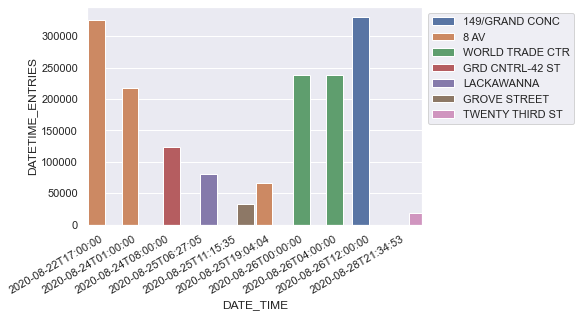

In [61]:
fig, ax = plt.subplots()
g = sns.barplot(x='DATE_TIME', y='DATETIME_ENTRIES',hue='STATION', ax=ax, data=top10_datetime, ci=None)
g.legend(bbox_to_anchor=(1, 1), ncol=1)
g.set_xticklabels([t.get_text().split(".")[0] for t in ax.get_xticklabels()], rotation=30, ha='right')
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .5)
plt.show()